## 多维数组的索引和切片

### 1. 基本用法

In [ ]:
import numpy as np
x = np.arange(1, 20, 2)
print(x)
print(x[3])
print(x[:4])
print(x[2:5:1])
print(x[:-3:1])
print(x[1:5:2])

多维的数组每个轴可以有一个索引。这些索引以逗号分隔的元组给出：

In [ ]:
l = [[0, 1, 2, 3, 4],
    [5, 6, 7, 8, 9],
    [10, 11, 12, 13, 14],
    [15, 16, 17, 18, 19]]
l[2][1]

In [ ]:
x = np.arange(20).reshape(4, 5)
print(x)

In [ ]:
x[1:3, 1] 

In [ ]:
x[:2, 2:]

In [ ]:
x[:,2]

In [ ]:
y = np.arange(60).reshape(3, 4, 5)
print(y.shape)
print(y)

In [ ]:
y[1, ...]  # 访问数组某个维度的全部内容， ...代替多个冒号

In [ ]:
y[:, :, 1]

### 2. 花式索引

In [ ]:
import numpy as np
a = np.arange(12)*2                       
i = np.array([1, 1, 3, 8, 5] )             
print(a)
print(i)
print(a[i])                                    

In [ ]:
#  j 是一个索引数组，用于从 a 中选择特定的元素，NumPy 根据 j 的形状返回一个新数组，
# 每个元素对应 a 中的索引值
a = np.arange(12)*2 
print(a)
j = np.array([[3, 4], [9, 7]])
a[j]

索引本身也可以是一个序列。

当索引数组a是多维的时，单个索引数组指的是第一个维度。

In [ ]:
palette = np.array( [[0,0,0],               
                     [255,0,0],              
                     [0,255,0],              
                     [0,0,255],              
                     [255,255,255] ] )       
image = np.array([ [ 0, 1, 2, 0 ],           
                   [ 0, 3, 4, 0 ]  ])
print(palette[image].shape)
palette[image]

In [ ]:
palette[image].ndim

我们还可以为多个维度提供索引。每个维度的索引数组必须具有相同的形状。

In [ ]:
a = np.arange(12).reshape(3,4)
print(a)
i = np.array( [ [0,1],                        # indices for the first dim of a
               [1,2] ] )
j = np.array( [ [2,1],                        # indices for the second dim
               [3,3] ] )

In [ ]:
a[i, j]

还可以利用数组索引来给指定元素赋值：

In [1]:
a = np.arange(5)
print(a)
a[[1,3,4]] = 0
a

NameError: name 'np' is not defined

如果这样：

In [ ]:
a[[1,3,4]] = [1,2,3]
a

这样呢？

In [ ]:
a[[0,0,2]] = [1,2,3]
a

那如果这样？

In [ ]:
a = np.arange(5)
print(a)
a[[1,3,4]] += 1
a

In [ ]:
a = np.arange(5)
a[[1,3,4]] += [1,2,3]
a

### 3. 使用布尔数组进行索引

In [ ]:
a = np.arange(12).reshape(3,4)
print(a)
b = a > 4
b

In [ ]:
a[b] 

此属性在分配中非常有用：

In [ ]:
a[b] = 0
a

对于数组的每个维度，我们给出一个1D布尔数组，选择我们想要的切片：

In [46]:
import numpy as np
a = np.arange(12).reshape(3,4)
print(a)
b1 = np.array([False,True,True])
b2 = np.array([True,False,True,False]) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [47]:
a[b1,:] 

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [48]:
# 当然也可以写成这样
a[b1] 

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [49]:
a[:,b2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [50]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
a[[1, 2],[0,2]]

array([ 4, 10])

In [60]:
import numpy as np
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])
b2 = np.array([False,True,False,True]) 
print(a)
a[b1,b2]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([ 5, 11])

**注意**:

1D布尔数组的长度必须与要切片的尺寸（或轴）的长度一致。

或者直接根据布尔运算来找到对应的值：

In [ ]:
array=np.arange(15)
print(array)
array[(array>=5) & (array<=10)]

### 4. ndarray的切片和python中的切片，有一个重要的区别

In [ ]:
a = [1, 2, 3]
b = a[:]
b
b[0] = 4
b

In [ ]:
a

In [ ]:
import numpy as np
a = np.array([1, 2, 3])
b = a[:]
b[0] = 4
b

In [ ]:
a

numpy 中，数组切片是原始数组的视图。而python中，切片是原始数组的复制。

看下面例子：

In [ ]:
import numpy as np

x = np.array([[1, 2], [3, 4], [5, 6]])
print(x)
y = x[[0, 1, 2], [0, 1, 0]]
print(y) 

In [ ]:
x[[0, 1, 2], [0, 1, 0]] = 0
print(x)
print(y)

上例属于索引，索引返回数据的副本，而切片只提供了一个访问视图。

#### 总结：
1. 以逗号分割的元组作为索引，可以针对轴进行索引
2. `:`和`...`都代表的是该轴上所有元素，<br>但是`...`的范围更广
3. 通过使用多维数组构成的数组实现花式索引
4. 布尔索引，实际上是将`True`值所对应的位置元素获取
5. 索引返回数据的副本，而切片只提供了一个访问视图。

#### 思考：
```Python
a = np.arange(25).reshape(5, 5)
```
+ 1：交换行、列
+ 2：将所有奇数替换为-1
+ 3：将对角线上值替换为0

In [ ]:
import numpy as np


a = np.arange(25).reshape(5, 5)
print("原始数组:")
print(a)


a_transposed = a.T
print("\n交换行、列后的数组:")
print(a_transposed)

a[a % 2 != 0] = -1
print("\n将所有奇数替换为-1后的数组：")
print(a)

row, cal = np.diag_indices_from(a)
a[row,cal] = 0
print("\n将对角线上值替换为0的数组")
print(a)

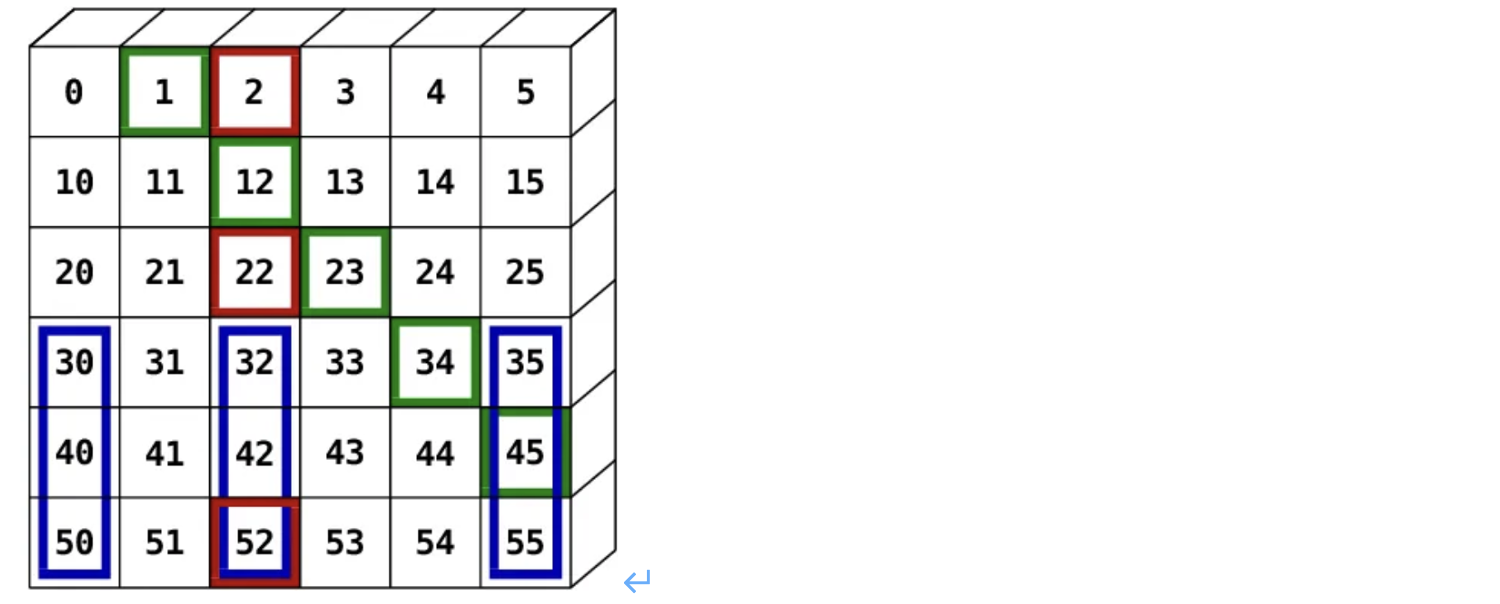

In [61]:
import numpy as np
a = np.array([[0,1,2,3,4,5],
              [10,11,12,13,14,15],
              [20,21,22,23,24,25],
              [30,31,32,33,34,35],
              [40,41,42,43,44,45],
              [50,51,52,53,54,55]
             ])
a[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5]]
print(a[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5]])
print(a[[0,2,5], 2])

[ 1 12 23 34 45]
[ 2 22 52]
